In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [51]:
with open('../../output/weights/p_date=2022-10-06-09_50_10/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

36001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [52]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [53]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

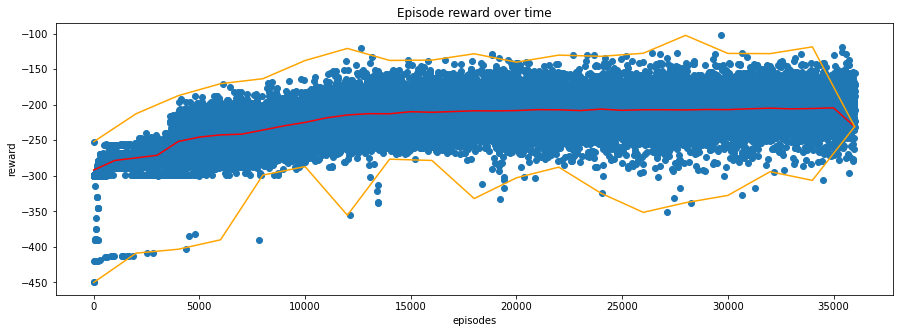

Maximum: -102.39999999999998
Average: -222.1565373184053
Moving Average (simple): {0: -291.8, 1000: -278.4, 2000: -274.8, 3000: -271.1, 4000: -251.7, 5000: -245.5, 6000: -242.4, 7000: -241.4, 8000: -235.6, 9000: -229.7, 10000: -224.8, 11000: -218.5, 12000: -214.4, 13000: -212.6, 14000: -212.7, 15000: -209.8, 16000: -210.6, 17000: -209.6, 18000: -208.5, 19000: -208.7, 20000: -208.2, 21000: -206.9, 22000: -207.1, 23000: -208.2, 24000: -206.2, 25000: -207.8, 26000: -207.0, 27000: -207.0, 28000: -207.3, 29000: -206.7, 30000: -206.9, 31000: -205.7, 32000: -204.8, 33000: -205.8, 34000: -205.3, 35000: -204.4, 36000: -230.8}

Moving Average: []
Minimum: -450.0


In [54]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

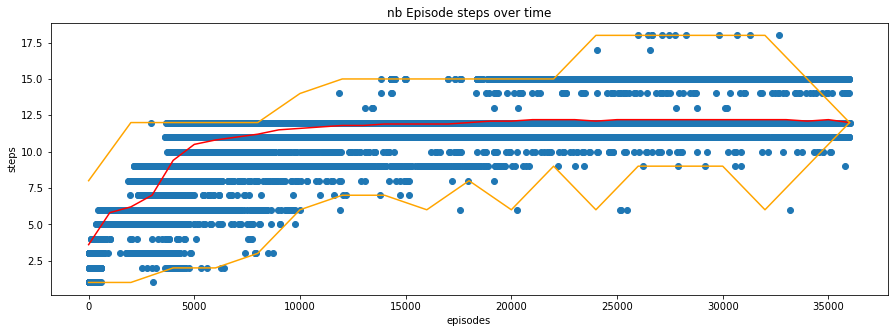

Maximum: 18
Average: 11.117191189133635
Moving Average (simple): {0: 3.6, 1000: 5.8, 2000: 6.2, 3000: 7.0, 4000: 9.4, 5000: 10.5, 6000: 10.8, 7000: 11.0, 8000: 11.2, 9000: 11.5, 10000: 11.6, 11000: 11.7, 12000: 11.8, 13000: 11.8, 14000: 11.9, 15000: 11.9, 16000: 11.9, 17000: 11.9, 18000: 12.0, 19000: 12.1, 20000: 12.1, 21000: 12.2, 22000: 12.2, 23000: 12.2, 24000: 12.1, 25000: 12.2, 26000: 12.2, 27000: 12.2, 28000: 12.2, 29000: 12.2, 30000: 12.2, 31000: 12.2, 32000: 12.2, 33000: 12.2, 34000: 12.1, 35000: 12.2, 36000: 12}

Moving Average: ['+61% (5.8 | 61%)', '+6% (6.2 | 72%)', '+12% (7.0 | 94%)', '+34% (9.4 | 161%)', '+11% (10.5 | 191%)', '+2% (10.8 | 200%)', '+1% (11.0 | 205%)', '+1% (11.2 | 211%)', '+2% (11.5 | 219%)', '+0% (11.6 | 222%)', '+0% (11.7 | 225%)', '+0% (11.8 | 227%)', '0% (11.8 | 227%)', '+0% (11.9 | 230%)', '0% (11.9 | 230%)', '0% (11.9 | 230%)', '0% (11.9 | 230%)', '+0% (12.0 | 233%)', '+0% (12.1 | 236%)', '0% (12.1 | 236%)', '+0% (12.2 | 238%)', '0% (12.2 | 238%)', '0

In [55]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

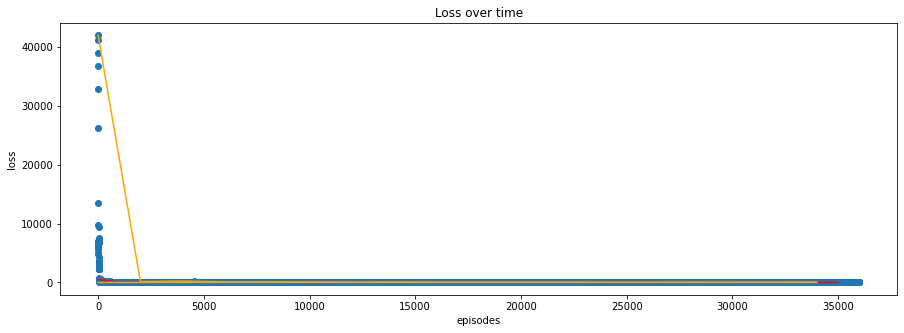

Maximum: 41971.08203125
Average: 37.497994874838575
Moving Average (simple): {0: 503.1, 1000: 32.4, 2000: 26.5, 3000: 33.1, 4000: 61.1, 5000: 45.6, 6000: 41.5, 7000: 39.0, 8000: 35.8, 9000: 31.2, 10000: 26.8, 11000: 24.2, 12000: 22.7, 13000: 22.2, 14000: 21.9, 15000: 21.5, 16000: 21.3, 17000: 21.7, 18000: 20.4, 19000: 19.7, 20000: 19.5, 21000: 18.4, 22000: 17.4, 23000: 17.9, 24000: 16.9, 25000: 16.7, 26000: 17.0, 27000: 17.6, 28000: 17.2, 29000: 17.0, 30000: 17.3, 31000: 17.4, 32000: 17.0, 33000: 17.0, 34000: 17.0, 35000: 16.4}

Moving Average: ['-93% (32.4 | -93%)', '-18% (26.5 | -94%)', '+24% (33.1 | -93%)', '+84% (61.1 | -87%)', '-25% (45.6 | -90%)', '-8% (41.5 | -91%)', '-6% (39.0 | -92%)', '-8% (35.8 | -92%)', '-12% (31.2 | -93%)', '-14% (26.8 | -94%)', '-9% (24.2 | -95%)', '-6% (22.7 | -95%)', '-2% (22.2 | -95%)', '-1% (21.9 | -95%)', '-1% (21.5 | -95%)', '0% (21.3 | -95%)', '+1% (21.7 | -95%)', '-5% (20.4 | -95%)', '-3% (19.7 | -96%)', '-1% (19.5 | -96%)', '-5% (18.4 | -96%)', '

In [56]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [57]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")